In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_diabetes/diabetes_data_preprocessed_original.csv")

df.shape
df.info()

df['readmitted'] = df['readmitted'].replace('>30', 2)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91023 entries, 0 to 91022
Data columns (total 43 columns):
Unnamed: 0                  91023 non-null int64
encounter_id                91023 non-null int64
patient_nbr                 91023 non-null int64
race                        91023 non-null float64
gender                      91023 non-null int64
age                         91023 non-null float64
admission_type_id           91023 non-null int64
discharge_disposition_id    91023 non-null int64
admission_source_id         91023 non-null int64
time_in_hospital            91023 non-null float64
num_medications             91023 non-null float64
diag_1                      91023 non-null float64
diag_2                      91023 non-null float64
diag_3                      91023 non-null float64
number_diagnoses            91023 non-null float64
max_glu_serum               91023 non-null int64
A1Cresult                   91023 non-null int64
metformin                   91023 non-null

In [2]:
feature_set = ['encounter_id',                
'patient_nbr',                 
'race',                        
'gender',                      
'age',                         
'admission_type_id',           
'discharge_disposition_id',    
'admission_source_id',         
'time_in_hospital',            
'num_medications',             
'diag_1',                      
'diag_2',                      
'diag_3',                      
'number_diagnoses',            
'max_glu_serum',               
'A1Cresult',                   
'metformin',                   
'repaglinide',                 
'nateglinide',                 
'chlorpropamide',              
'glimepiride',                 
'acetohexamide',               
'glipizide',                   
'glyburide',                   
'tolbutamide',                 
'pioglitazone',                
'rosiglitazone',               
'acarbose',                    
'miglitol',                    
'troglitazone',                
'tolazamide',                  
'insulin',                     
'glyburide-metformin',         
'glipizide-metformin',         
'glimepiride-pioglitazone',    
'metformin-rosiglitazone',     
'metformin-pioglitazone',      
'change',                      
'diabetesMed',                 
'number_services',             
'num_total_procedures']

the_input = df[feature_set]
the_output = df['readmitted']

from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(the_input, the_output)
train_input_new = pd.DataFrame(train_input_new, columns = list(the_input.columns))

X_train, X_test, Y_train, Y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [3]:
print(X_train, X_test, Y_train, Y_test)
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

        encounter_id   patient_nbr      race    gender       age  \
73051   2.513316e+08  9.052808e+07  0.174986  0.000000 -1.306313   
12069   5.363576e+07  4.182106e+07  0.174986  0.000000  1.201972   
2374    1.722436e+07  1.130331e+08  0.174986  0.000000  0.574901   
59432   1.844201e+08  8.997041e+07  0.174986  1.000000  1.201972   
137638  7.735902e+07  4.865508e+06 -0.063156  1.000000 -0.770271   
120547  5.995989e+07  6.550024e+05 -0.158706  0.000000 -0.796098   
130754  1.008520e+08  5.983323e+07  0.174986  0.657987 -0.068498   
17144   6.846376e+07  3.802266e+06  0.174986  0.000000 -0.679242   
9687    4.556339e+07  2.445660e+05  0.174986  0.000000 -0.679242   
141814  2.698650e+08  8.558346e+07  0.174986  1.000000  0.713150   
90579   4.366869e+08  1.365454e+08  0.174986  1.000000 -0.679242   
112511  7.919471e+07  2.812667e+07  0.174986  0.787770 -0.279991   
82955   3.219662e+08  6.823030e+07  0.174986  0.000000 -0.052170   
29786   1.057375e+08  2.347804e+07  0.174986  1.

In [4]:
print(xgb.XGBClassifier())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [5]:
colsample_bytree = np.arange(0.3,1.1,0.1)
gamma = [0,1,5]
learning_rate = np.arange(0.01,0.11,0.01)
max_depth = [1,2,3,4,5]
n_estimators = [100,200,300,400,500]
subsample = np.arange(0.8,1.0,0.1)
subsample = np.concatenate((subsample, [1.]))

print(colsample_bytree)
print(gamma)
print(learning_rate)
print(max_depth)
print(n_estimators)
print(subsample)

[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0, 1, 5]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[1, 2, 3, 4, 5]
[100, 200, 300, 400, 500]
[0.8 0.9 1. ]


In [6]:
result_cv = np.zeros((len(colsample_bytree),len(gamma)))
result = np.zeros((len(colsample_bytree),len(gamma)))
for i, i0 in enumerate(colsample_bytree):
    for j,i1 in enumerate(gamma):
        xg_reg = xgb.XGBClassifier(
            colsample_bytree=i0,
            gamma=i1
            )
        
        result_cv[i][j] = np.mean(cross_val_score(xg_reg, X_train, Y_train, cv=10))
        print("Cross Validation score:",result_cv[i][j])
        xg_reg.fit(X_train,Y_train)
        Y_test_predict = xg_reg.predict(X_test)
        
        result[i][j] = accuracy_score(Y_test, Y_test_predict)
        print("Accuracy:",result[i][j])
        print("")

Cross Validation score: 0.6214837145852729
Accuracy: 0.6253970446070984

Cross Validation score: 0.6214750775193422
Accuracy: 0.6253625189890899

Cross Validation score: 0.6220188647957505
Accuracy: 0.6258458776412098

Cross Validation score: 0.6220102165553556
Accuracy: 0.6250517884270128

Cross Validation score: 0.6216649685678624
Accuracy: 0.6249827371909957

Cross Validation score: 0.621621821974843
Accuracy: 0.6249827371909957

Cross Validation score: 0.621552784297373
Accuracy: 0.6257423007871841

Cross Validation score: 0.6216131841640168
Accuracy: 0.6261220825852782

Cross Validation score: 0.6213197295213038
Accuracy: 0.6252589421350642

Cross Validation score: 0.6213887560249522
Accuracy: 0.6239469686507388

Cross Validation score: 0.6209140302661486
Accuracy: 0.6244993785388758

Cross Validation score: 0.6214059943988621
Accuracy: 0.6234636099986189

Cross Validation score: 0.6215700435306775
Accuracy: 0.6236707637066703

Cross Validation score: 0.6211039600513028
Accuracy: 

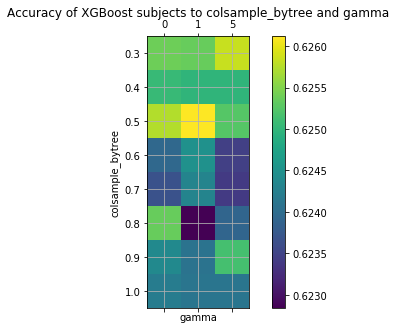

In [7]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(result, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+gamma) 
ax.set_yticklabels(['']+[str(round(float(label), 2)) for label in colsample_bytree])
plt.grid()
plt.title('Accuracy of XGBoost subjects to colsample_bytree and gamma')
plt.ylabel('colsample_bytree')
plt.xlabel('gamma')
plt.show()

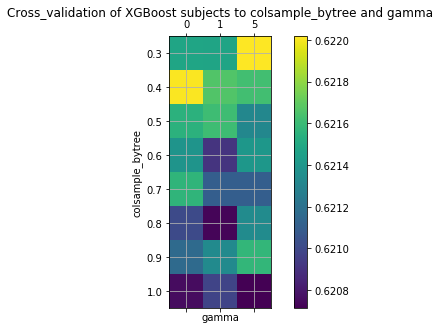

In [8]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(result_cv, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+gamma) 
ax.set_yticklabels(['']+[str(round(float(label), 2)) for label in colsample_bytree])
plt.grid()
plt.title('Cross_validation of XGBoost subjects to colsample_bytree and gamma')
plt.ylabel('colsample_bytree')
plt.xlabel('gamma')
plt.show()

In [9]:
result_cv = np.zeros((len(learning_rate),len(max_depth)))
result = np.zeros((len(learning_rate),len(max_depth)))
for i,i2 in enumerate(learning_rate):
    for j,i3 in enumerate(max_depth):
        xg_reg = xgb.XGBClassifier(
            colsample_bytree=0.5,
            gamma=1,
            learning_rate=i2,
            max_depth=i3
            )
                   
        result_cv[i][j] = np.mean(cross_val_score(xg_reg, X_train, Y_train, cv=10))
        print("Cross Validation score:",result_cv[i][j])
        xg_reg.fit(X_train,Y_train)
        Y_test_predict = xg_reg.predict(X_test)
        
        result[i][j] = accuracy_score(Y_test, Y_test_predict)
        print("Accuracy:",result[i][j])
        print("")

Cross Validation score: 0.5034052140185785
Accuracy: 0.508286148322055

Cross Validation score: 0.5561522006376329
Accuracy: 0.5575542052202734

Cross Validation score: 0.5851797644306629
Accuracy: 0.5881439027758597

Cross Validation score: 0.6027879607965099
Accuracy: 0.6066151084104405

Cross Validation score: 0.6127055581433086
Accuracy: 0.6169382681950006

Cross Validation score: 0.5027923607530054
Accuracy: 0.5079408921419694

Cross Validation score: 0.5702473049578843
Accuracy: 0.5731943101781521

Cross Validation score: 0.5900392837746745
Accuracy: 0.5923905537909129

Cross Validation score: 0.6068188641141526
Accuracy: 0.6103784007733738

Cross Validation score: 0.6161495164142302
Accuracy: 0.6203908299958569

Cross Validation score: 0.5066678780770133
Accuracy: 0.5119458638309625

Cross Validation score: 0.581839385397644
Accuracy: 0.584967545919072

Cross Validation score: 0.5947520467421537
Accuracy: 0.5983289600883855

Cross Validation score: 0.6127055305784382
Accuracy: 0

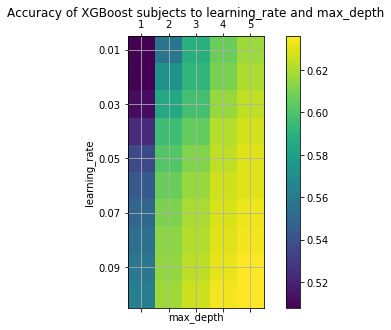

In [10]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(result, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+max_depth)
ax.set_yticklabels(['']+['0.01', '0.03', '0.05', '0.07', '0.09'])
plt.grid()
plt.title('Accuracy of XGBoost subjects to learning_rate and max_depth')
plt.ylabel('learning_rate')
plt.xlabel('max_depth')
plt.show()

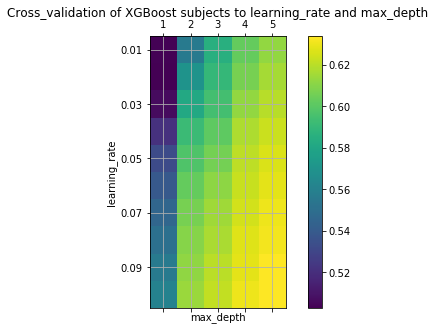

In [11]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(result_cv, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+max_depth)
ax.set_yticklabels(['']+['0.01', '0.03', '0.05', '0.07', '0.09'])
plt.grid()
plt.title('Cross_validation of XGBoost subjects to learning_rate and max_depth')
plt.ylabel('learning_rate')
plt.xlabel('max_depth')
plt.show()

In [12]:
result_cv = np.zeros((len(n_estimators),len(subsample)))
result = np.zeros((len(n_estimators),len(subsample)))
for i,i4 in enumerate(n_estimators):  
    for j,i5 in enumerate(subsample):
        xg_reg = xgb.XGBClassifier(
            colsample_bytree=0.5,
            gamma=1,
            learning_rate=0.1,
            max_depth=5,
            n_estimators=i4,
            subsample=i5
            )
        
        result_cv[i][j] = np.mean(cross_val_score(xg_reg, X_train, Y_train, cv=10))
        print("Cross Validation score:",result_cv[i][j])
        xg_reg.fit(X_train,Y_train)
        Y_test_predict = xg_reg.predict(X_test)
        
        result[i][j] = accuracy_score(Y_test, Y_test_predict)
        print("Accuracy:",result[i][j])
        print("")

Cross Validation score: 0.6347503325003953
Accuracy: 0.6375500621461124

Cross Validation score: 0.634474087920926
Accuracy: 0.6377572158541638

Cross Validation score: 0.6337231682444339
Accuracy: 0.6358928324817015

Cross Validation score: 0.6396961643986341
Accuracy: 0.6424526999033283

Cross Validation score: 0.6394889813370264
Accuracy: 0.6424872255213369

Cross Validation score: 0.6388934565903455
Accuracy: 0.641520508217097

Cross Validation score: 0.6424755378986624
Accuracy: 0.6458362104681674

Cross Validation score: 0.6417245645784917
Accuracy: 0.6443516088937992

Cross Validation score: 0.641146260325652
Accuracy: 0.6431432122634995

Cross Validation score: 0.6445126019626253
Accuracy: 0.6465612484463472

Cross Validation score: 0.6434508864595005
Accuracy: 0.6454219030520646

Cross Validation score: 0.6423719497195678
Accuracy: 0.6452147493440132

Cross Validation score: 0.6457813932486166
Accuracy: 0.6469755558624499

Cross Validation score: 0.6453670815081887
Accuracy: 0

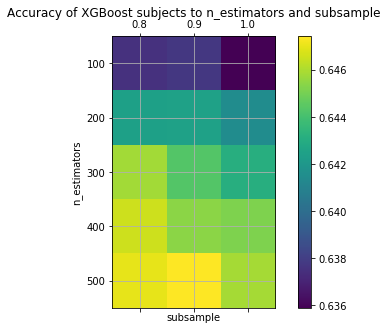

In [13]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(result, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+['0.8', '0.9', '1.0'])
ax.set_yticklabels(['']+['100', '200', '300', '400', '500'])
plt.grid()
plt.title('Accuracy of XGBoost subjects to n_estimators and subsample')
plt.ylabel('n_estimators')
plt.xlabel('subsample')
plt.show()

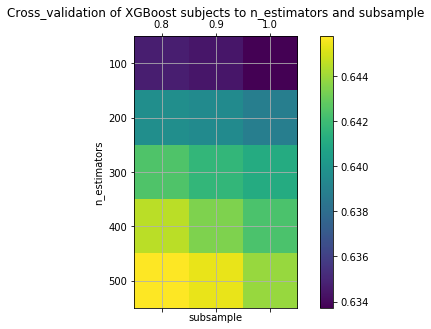

In [14]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(result_cv, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+['0.8', '0.9', '1.0'])
ax.set_yticklabels(['']+['100', '200', '300', '400', '500'])
plt.grid()
plt.title('Cross_validation of XGBoost subjects to n_estimators and subsample')
plt.ylabel('n_estimators')
plt.xlabel('subsample')
plt.show()

In [15]:
xg_reg = xgb.XGBClassifier(
            colsample_bytree=0.5,
            gamma=1,
            learning_rate=0.1,
            max_depth=5,
            n_estimators=500,
            subsample=0.9
            )
    
print("Cross Validation score:",np.mean(cross_val_score(xg_reg, X_train, Y_train, cv=10)))
xg_reg.fit(X_train,Y_train)
Y_test_predict = xg_reg.predict(X_test)
print("Original Data Final XGBoost Accuracy:", accuracy_score(Y_test, Y_test_predict))

Cross Validation score: 0.6453670815081887
Original Data Final XGBoost Accuracy: 0.6474243888965613
